## Programming a stochastic compartment-based SIR model with demography in Python

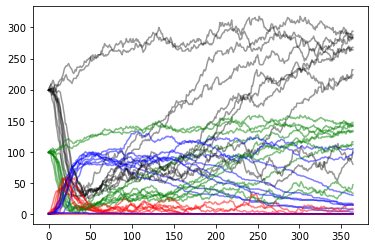

In [14]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# PARAMETERS

# number of repetitions
NB_RUNS = 10

# time parameters
dt = 1
total_duration = 365

# model parameters
gamma = 0.1
beta = 0.5
mu = 0.01
birth = mu
K = 150

# initial conditions
S_init = 99
I_init = 1
R_init = 0

allS = np.zeros((NB_RUNS, int(np.floor(total_duration/dt))))
allI = np.zeros((NB_RUNS, int(np.floor(total_duration/dt))))
allR = np.zeros((NB_RUNS, int(np.floor(total_duration/dt))))

t = np.arange(0, total_duration, dt)

# iterate over repetitions
for run in range(NB_RUNS):
    S, I, R = S_init, I_init, R_init
    for step in range(int(np.floor(total_duration / dt))):
        # store current value of state variables
        allS[run][step] = S
        allI[run][step] = I
        allR[run][step] = R

        # update total population
        N = S + I + R

        # compute actual mortality rate
        mort = mu * N / K
        
        # compute outgoing rates from each state
        out_S = beta*I/N + mort
        out_I = gamma + mort
        out_R = mort
        
        # compute transition probabilities
        p_out_S = 1 - np.exp(-out_S * dt)
        p_out_I = 1 - np.exp(-out_I * dt)
        p_out_R = 1 - np.exp(-out_R * dt)
        
        pSI = p_out_S * (beta*I/N) / out_S if out_S > 0 else 0
        pSdead = p_out_S * mort / out_S if out_S > 0 else 0

        pIR = p_out_I * gamma / out_I if out_I > 0 else 0
        pIdead = p_out_I * mort / out_I if out_I > 0 else 0
            
        # draw random values for transitions
        dSI, dSdead, _ = np.random.multinomial(S, [pSI, pSdead, 1-pSI-pSdead])
        dIR, dIdead, _ = np.random.multinomial(I, [pIR, pIdead, 1-pIR-pIdead])
        dRdead = np.random.binomial(R, p_out_R)
    
        q_birth = np.random.poisson(N * birth * dt)
        
        # update state variable values
        S += q_birth - dSI - dSdead
        I += dSI - dIR - dIdead
        R += dIR - dRdead


fig, ax = plt.subplots()
for run in range(NB_RUNS):
    ax.plot(t, allS[run], 'green', alpha=0.5)
    ax.plot(t, allI[run], 'red', alpha=0.5)
    ax.plot(t, allR[run], 'blue', alpha=0.5)
    ax.plot(t, allS[run]+allI[run]+allS[run], 'black', alpha=0.4)
plt.show()
